In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
latitude_london = 51.5074
longitude_london = -0.1278
latitude_seattle = 47.6062
longitude_seattle = -122.3321

start_date = '2022-01-01'
end_date = '2022-12-31' 

hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [8]:
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_london = {
    'latitude': latitude_london,
    'longitude': longitude_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response_london = requests.get(base_url, params=params_london)

In [9]:
if response_london.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_london.status_code}')

Data fetched successfully!


In [10]:


params_seattle = {
    'latitude': latitude_seattle,
    'longitude': longitude_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'US/Pacific'
}

response_seattle = requests.get(base_url, params=params_seattle)

In [11]:
if response_seattle.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_seattle.status_code}')

Data fetched successfully!


In [12]:
data_london = response_london.json()
hourly_data = data_london['hourly']

df_london = pd.DataFrame(hourly_data)
df_london.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,93,0.0
1,2022-01-01T01:00,12.8,93,0.0
2,2022-01-01T02:00,12.5,93,0.0
3,2022-01-01T03:00,12.3,92,0.0
4,2022-01-01T04:00,11.9,93,0.0


In [13]:
data_seattle = response_seattle.json()
hourly_data = data_seattle['hourly']

df_seattle = pd.DataFrame(hourly_data)
df_seattle.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,-6.4,76,0.0
1,2022-01-01T01:00,-8.3,82,0.0
2,2022-01-01T02:00,-8.1,82,0.0
3,2022-01-01T03:00,-7.9,81,0.0
4,2022-01-01T04:00,-6.2,73,0.0


convert time columns to datetime objects, and set them as the index

In [14]:
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace=True)
df_london.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [15]:
df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace=True)
df_seattle.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

resample hourly data into weekly totals

In [21]:
weekly_avg_london = df_london.resample('W').mean()
weekly_avg_seattle = df_seattle.resample('W').mean()


In [22]:
# combining dataframes for comparison

combined_precip = pd.DataFrame({
    'London': weekly_avg_london['precipitation'],
    'Seattle': weekly_avg_seattle['precipitation']
})
print(combined_precip.head())


              London   Seattle
time                          
2022-01-02  0.045833  0.797917
2022-01-09  0.076786  0.605952
2022-01-16  0.018452  0.270833
2022-01-23  0.000000  0.093452
2022-01-30  0.002381  0.039286


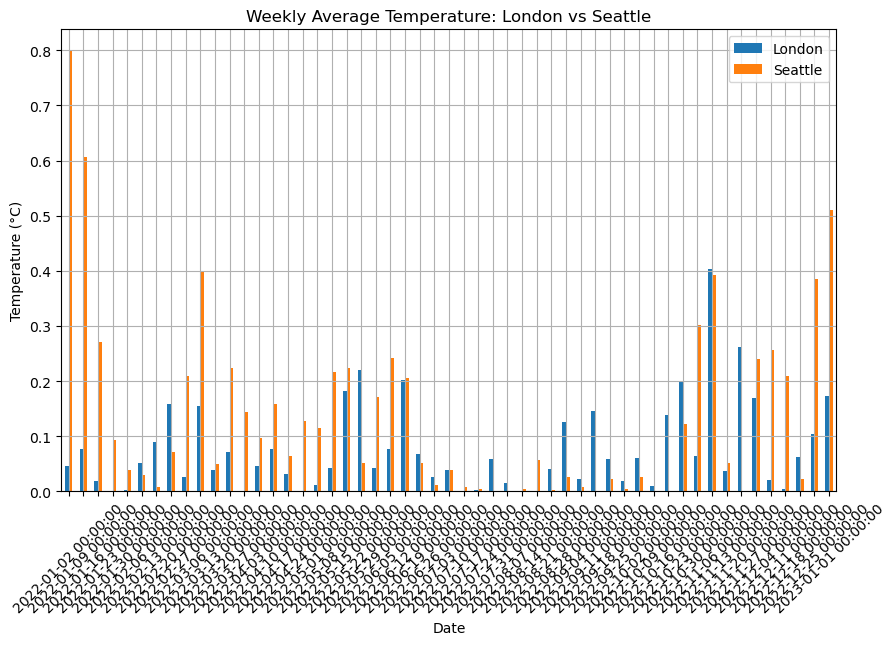

In [23]:
# plotting weekly total precipitation for both cities on the same graph


combined_precip.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation(mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Analysis

Looking at our Weekly Average Temperature plot, we find that Seattle had much more rainfall than London did in 2022. There are significant differences within the winter months. 